# Lesson 3 Module 2: Consistency of Estimators

This notebook demonstrates consistency concepts using practical examples.
It builds on Lesson 1 (LLN/CLT) and connects to Lesson 2 (MLE/MoM estimators).

## Learning Objectives
- Define consistency (convergence in probability) and strong consistency
- Connect consistency to the Law of Large Numbers (Lesson 1)
- Identify consistent vs inconsistent estimators
- Apply consistency concepts to MLE and MoM estimators (Lesson 2)

## Repository Context
- Uses the `uniform_max_consistency()` function from the appendix
- Demonstrates connections to Lesson 1 (LLN/CLT) foundations
- Shows consistency of Lesson 2 estimators (MLE/MoM)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style and random seed
sns.set_theme(context="talk", style="whitegrid")
sns.set_palette(["#000000", "#E69F00", "#56B4E9", "#009E73",
                 "#F0E442", "#0072B2", "#D55E00", "#CC79A7"])
rng = np.random.default_rng(2025)

print("Environment setup complete. Random seed: 2025")

Environment setup complete. Random seed: 2025


## 1. Consistency Demonstration Functions

Let's implement functions to demonstrate consistency empirically.

In [2]:
def check_consistency(estimator_fn, true_theta, gen_fn, n_values, R=1000, epsilon=0.1):
    """
    Empirically check consistency by computing convergence rates.

    Parameters:
    -----------
    estimator_fn : callable
        Function that takes sample and returns estimate
    true_theta : float
        True parameter value
    gen_fn : callable
        Function that generates sample of size n
    n_values : array-like
        Sample sizes to test
    R : int
        Number of replications per sample size
    epsilon : float
        Tolerance for |estimator - true| > epsilon

    Returns:
    --------
    DataFrame with sample sizes and convergence rates
    """
    results = []

    for n in n_values:
        errors = np.zeros(R)

        for r in range(R):
            sample = gen_fn(n)
            estimate = estimator_fn(sample)
            errors[r] = abs(estimate - true_theta)

        # Proportion of estimates within epsilon of truth
        convergence_rate = np.mean(errors <= epsilon)

        results.append({
            'n': n,
            'convergence_rate': convergence_rate,
            'mean_error': np.mean(errors),
            'std_error': np.std(errors, ddof=1)
        })

    return pd.DataFrame(results)

print("Function defined: check_consistency")

Function defined: check_consistency


## 2. Sample Mean Consistency (Normal Data)

Demonstrate that sample means are consistent for population means.

In [3]:
def sample_mean(x):
    return np.mean(x)

def generate_normal(n):
    return rng.normal(5.0, 2.0, n)  # mu=5, sigma=2

# Test consistency across sample sizes
n_values = [5, 10, 20, 50, 100, 200, 500]
consistency_results = check_consistency(
    sample_mean, 5.0, generate_normal, n_values, R=2000, epsilon=0.1
)

print("Sample mean consistency results:")
print(consistency_results.round(4))

Sample mean consistency results:
     n  convergence_rate  mean_error  std_error
0    5            0.0890      0.7137     0.5370
1   10            0.1295      0.5173     0.3822
2   20            0.1710      0.3568     0.2643
3   50            0.2535      0.2352     0.1733
4  100            0.3830      0.1601     0.1202
5  200            0.5305      0.1111     0.0857
6  500            0.7285      0.0712     0.0548


/var/folders/rv/9hkk54m92hq2s0j4cm1xnph53d62_8/T/ipykernel_67381/2152971195.py:20: UserWarning: Glyph 8345 (\N{LATIN SUBSCRIPT SMALL LETTER N}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/rv/9hkk54m92hq2s0j4cm1xnph53d62_8/T/ipykernel_67381/2152971195.py:21: UserWarning: Glyph 8345 (\N{LATIN SUBSCRIPT SMALL LETTER N}) missing from font(s) Arial.
  plt.savefig('../figures/sample_mean_consistency.png', dpi=150, bbox_inches='tight')
/opt/homebrew/Caskroom/miniforge/base/envs/applied-stats/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8345 (\N{LATIN SUBSCRIPT SMALL LETTER N}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


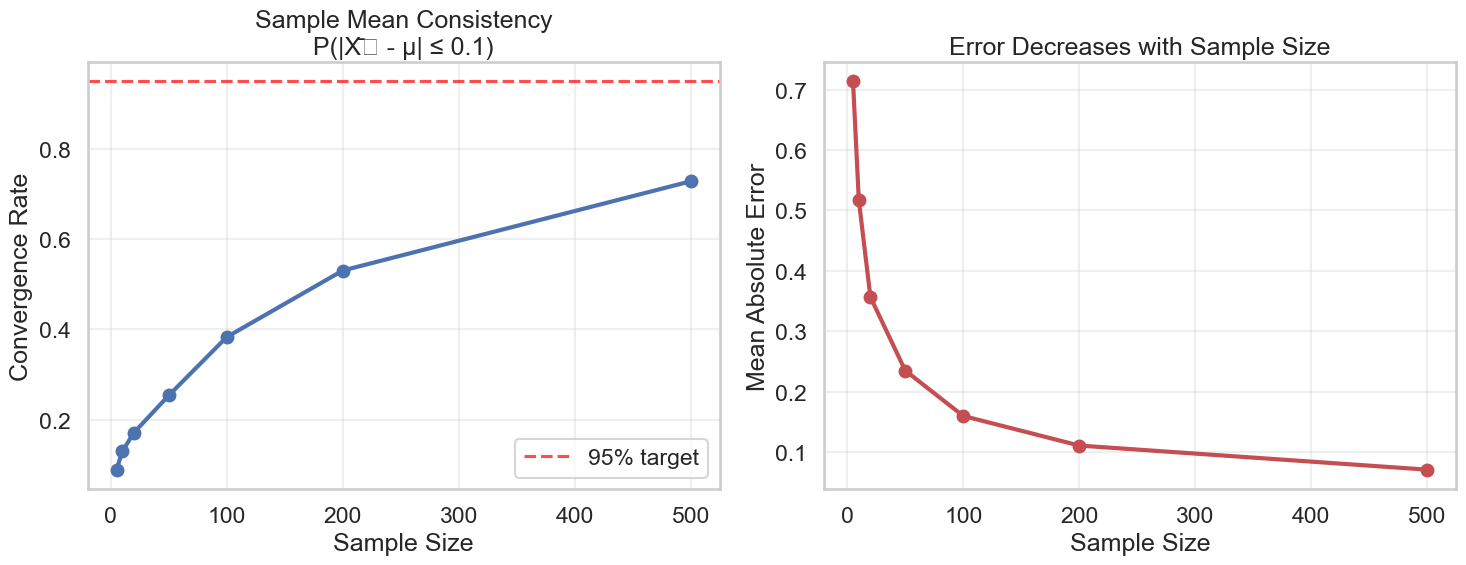

For n=500: Convergence rate = 0.729
For n=500: Mean error = 0.071


In [5]:
# Plot convergence
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Convergence rate
axes[0].plot(consistency_results['n'], consistency_results['convergence_rate'], 'b-', linewidth=3, marker='o')
axes[0].axhline(0.95, color='red', linestyle='--', alpha=0.7, label='95% target')
axes[0].set_xlabel('Sample Size')
axes[0].set_ylabel('Convergence Rate')
axes[0].set_title('Sample Mean Consistency\nP(|X̄ₙ - μ| ≤ 0.1)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Mean error vs sample size
axes[1].plot(consistency_results['n'], consistency_results['mean_error'], 'r-', linewidth=3, marker='o')
axes[1].set_xlabel('Sample Size')
axes[1].set_ylabel('Mean Absolute Error')
axes[1].set_title('Error Decreases with Sample Size')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/sample_mean_consistency.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"For n={n_values[-1]}: Convergence rate = {consistency_results.iloc[-1]['convergence_rate']:.3f}")
print(f"For n={n_values[-1]}: Mean error = {consistency_results.iloc[-1]['mean_error']:.3f}")

## 3. Uniform Maximum Estimator (Biased but Consistent)

Using the function from the appendix to demonstrate consistency.

In [7]:
def uniform_max(x):
    return np.max(x)

def generate_uniform(n):
    return rng.uniform(0, 3.0, n)  # theta = 3

# Test uniform max consistency
uniform_results = check_consistency(
    uniform_max, 3.0, generate_uniform, n_values, R=2000, epsilon=0.1
)

print("Uniform maximum consistency results:")
print(uniform_results.round(4))

Uniform maximum consistency results:
     n  convergence_rate  mean_error  std_error
0    5            0.1500      0.5017     0.4195
1   10            0.2875      0.2714     0.2414
2   20            0.5060      0.1393     0.1368
3   50            0.8205      0.0592     0.0585
4  100            0.9640      0.0300     0.0302
5  200            0.9990      0.0154     0.0150
6  500            1.0000      0.0058     0.0057


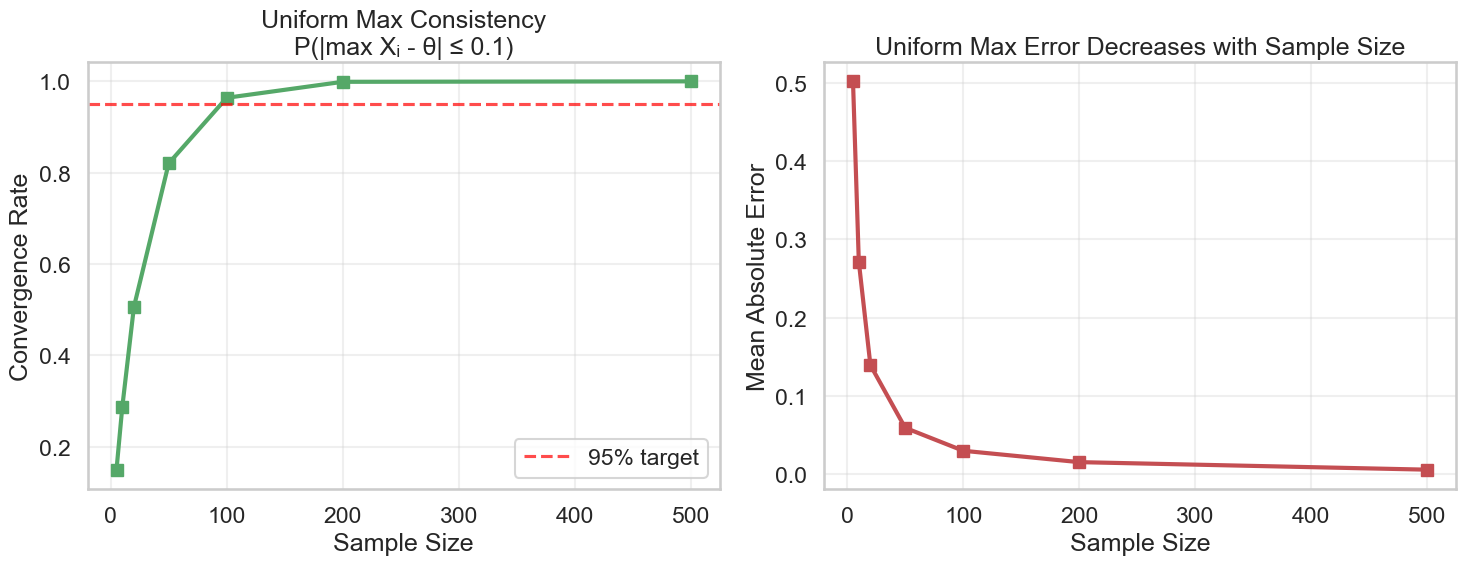

For n=500: Convergence rate = 1.000
For n=500: Mean error = 0.006


In [8]:
# Plot uniform max convergence
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Convergence rate
axes[0].plot(uniform_results['n'], uniform_results['convergence_rate'], 'g-', linewidth=3, marker='s')
axes[0].axhline(0.95, color='red', linestyle='--', alpha=0.7, label='95% target')
axes[0].set_xlabel('Sample Size')
axes[0].set_ylabel('Convergence Rate')
axes[0].set_title('Uniform Max Consistency\nP(|max Xᵢ - θ| ≤ 0.1)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Mean error vs sample size
axes[1].plot(uniform_results['n'], uniform_results['mean_error'], 'r-', linewidth=3, marker='s')
axes[1].set_xlabel('Sample Size')
axes[1].set_ylabel('Mean Absolute Error')
axes[1].set_title('Uniform Max Error Decreases with Sample Size')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/uniform_max_consistency.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"For n={n_values[-1]}: Convergence rate = {uniform_results.iloc[-1]['convergence_rate']:.3f}")
print(f"For n={n_values[-1]}: Mean error = {uniform_results.iloc[-1]['mean_error']:.3f}")

## 4. Inconsistent Estimator: First Observation

Demonstrate that using only the first observation is inconsistent.

In [9]:
def first_observation(x):
    return x[0]  # Always use first observation

# Test first observation "estimator"
inconsistent_results = check_consistency(
    first_observation, 5.0, generate_normal, n_values, R=2000, epsilon=0.1
)

print("First observation 'estimator' results:")
print(inconsistent_results.round(4))

First observation 'estimator' results:
     n  convergence_rate  mean_error  std_error
0    5            0.0385      1.6609     1.2392
1   10            0.0355      1.6298     1.2124
2   20            0.0380      1.5867     1.2242
3   50            0.0360      1.5718     1.1725
4  100            0.0395      1.5873     1.1994
5  200            0.0405      1.6339     1.2120
6  500            0.0390      1.6198     1.2222


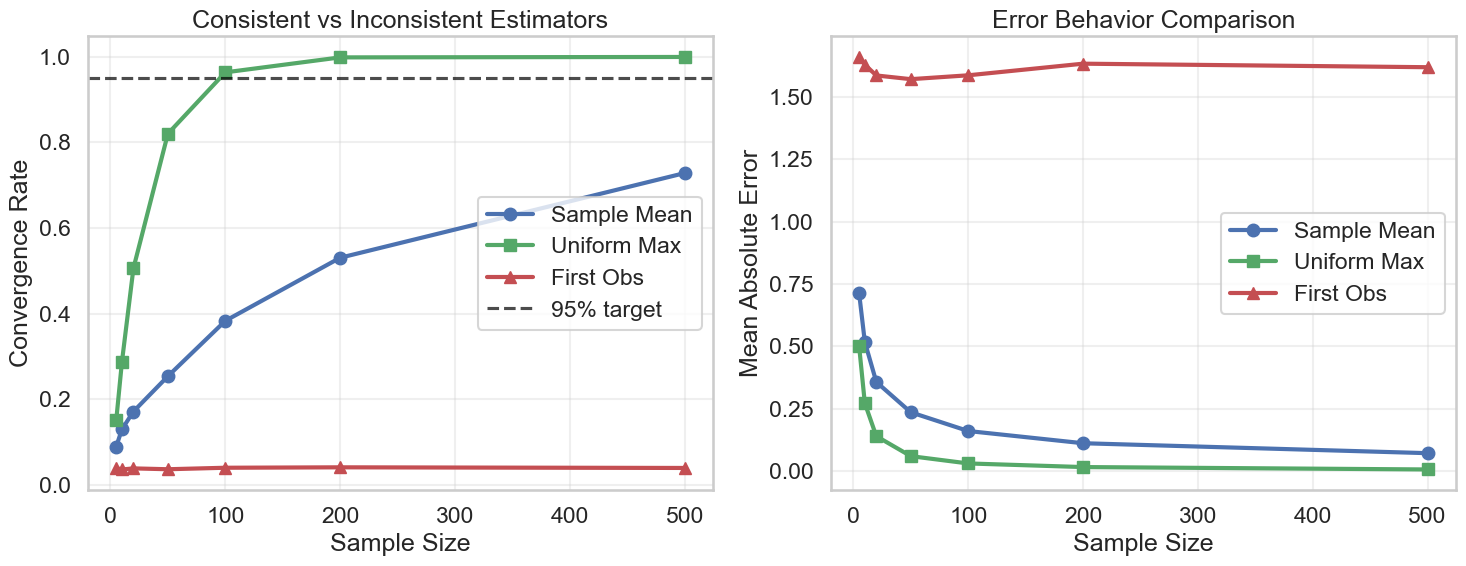

Consistency comparison complete
Sample mean (n=500): Convergence rate = 0.729
Uniform max (n=500): Convergence rate = 1.000
First obs (n=500): Convergence rate = 0.039


In [10]:
# Plot comparison of consistent vs inconsistent
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Convergence rate comparison
axes[0].plot(consistency_results['n'], consistency_results['convergence_rate'], 'b-', linewidth=3, marker='o', label='Sample Mean')
axes[0].plot(uniform_results['n'], uniform_results['convergence_rate'], 'g-', linewidth=3, marker='s', label='Uniform Max')
axes[0].plot(inconsistent_results['n'], inconsistent_results['convergence_rate'], 'r-', linewidth=3, marker='^', label='First Obs')
axes[0].axhline(0.95, color='black', linestyle='--', alpha=0.7, label='95% target')
axes[0].set_xlabel('Sample Size')
axes[0].set_ylabel('Convergence Rate')
axes[0].set_title('Consistent vs Inconsistent Estimators')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Mean error comparison
axes[1].plot(consistency_results['n'], consistency_results['mean_error'], 'b-', linewidth=3, marker='o', label='Sample Mean')
axes[1].plot(uniform_results['n'], uniform_results['mean_error'], 'g-', linewidth=3, marker='s', label='Uniform Max')
axes[1].plot(inconsistent_results['n'], inconsistent_results['mean_error'], 'r-', linewidth=3, marker='^', label='First Obs')
axes[1].set_xlabel('Sample Size')
axes[1].set_ylabel('Mean Absolute Error')
axes[1].set_title('Error Behavior Comparison')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/consistency_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("Consistency comparison complete")
print(f"Sample mean (n={n_values[-1]}): Convergence rate = {consistency_results.iloc[-1]['convergence_rate']:.3f}")
print(f"Uniform max (n={n_values[-1]}): Convergence rate = {uniform_results.iloc[-1]['convergence_rate']:.3f}")
print(f"First obs (n={n_values[-1]}): Convergence rate = {inconsistent_results.iloc[-1]['convergence_rate']:.3f}")

## 5. MLE and MoM Consistency (Lesson 2 Connection)

Show that estimators from Lesson 2 are consistent.

In [11]:
# Bernoulli parameter estimation (both MLE and MoM)
def bernoulli_mle(x):
    return np.mean(x)  # MLE and MoM coincide for Bernoulli

def generate_bernoulli(n):
    return rng.binomial(1, 0.7, n)  # p = 0.7

# Test Bernoulli estimator consistency
bernoulli_results = check_consistency(
    bernoulli_mle, 0.7, generate_bernoulli, n_values, R=2000, epsilon=0.05
)

print("Bernoulli estimator consistency results:")
print(bernoulli_results.round(4))

Bernoulli estimator consistency results:
     n  convergence_rate  mean_error  std_error
0    5            0.0000      0.1728     0.1100
1   10            0.2720      0.1101     0.0905
2   20            0.3510      0.0823     0.0649
3   50            0.5655      0.0512     0.0390
4  100            0.7280      0.0355     0.0270
5  200            0.8805      0.0255     0.0190
6  500            0.9840      0.0165     0.0126


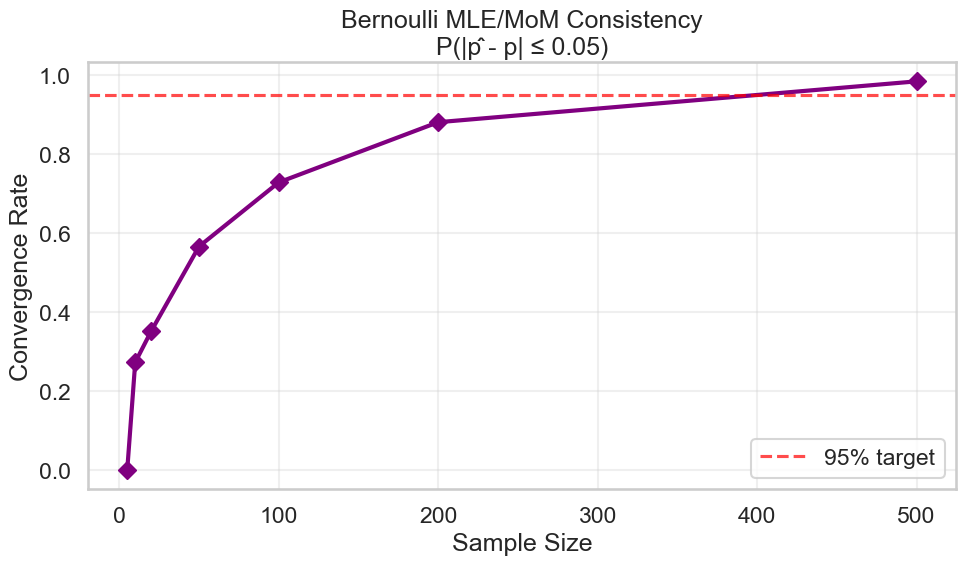

Bernoulli estimator (n=500): Convergence rate = 0.984


In [12]:
# Plot Bernoulli estimator convergence
plt.figure(figsize=(10, 6))

plt.plot(bernoulli_results['n'], bernoulli_results['convergence_rate'], 'purple', linewidth=3, marker='D')
plt.axhline(0.95, color='red', linestyle='--', alpha=0.7, label='95% target')
plt.xlabel('Sample Size')
plt.ylabel('Convergence Rate')
plt.title('Bernoulli MLE/MoM Consistency\nP(|p̂ - p| ≤ 0.05)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/bernoulli_consistency.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Bernoulli estimator (n={n_values[-1]}): Convergence rate = {bernoulli_results.iloc[-1]['convergence_rate']:.3f}")

## 6. Summary and Key Takeaways

This notebook demonstrated:
1. Sample means are consistent by the Law of Large Numbers (Lesson 1)
2. Biased estimators (like uniform max) can still be consistent
3. Inconsistent estimators fail because variance doesn't vanish
4. MLE and MoM estimators from Lesson 2 are typically consistent

Key insights:
- Consistency requires vanishing variance, not just correct centering
- The LLN (Lesson 1) guarantees consistency of sample means
- Lesson 2 estimators inherit consistency from the LLN
- Visual inspection of convergence rates helps understand consistency